Breast Cancer Detection - Complete Machine Learning Analysis

1. DATA LOADING AND EXPLORATION
--------------------------------------------------
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target distribution:
  - Benign (0): 212 samples (37.3%)
  - Malignant (1): 357 samples (62.7%)

2. DATA PREPROCESSING
--------------------------------------------------
Data standardized using StandardScaler
Training set: 398 samples (69.9%)
Testing set: 171 samples (30.1%)

3. MODEL IMPLEMENTATION
--------------------------------------------------
Implementing models from Agarap (2018) paper...
Implementing additional model from course materials (Random Forest)...

4. MODEL TRAINING AND EVALUATION
--------------------------------------------------
Training models...
   Training MLP (Paper)...
   MLP (Paper) completed
   Training KNN (Paper)...
   KNN (Paper) completed
   Training Random Forest (Course)...
   Random Forest (Course) completed
All models trained successfully

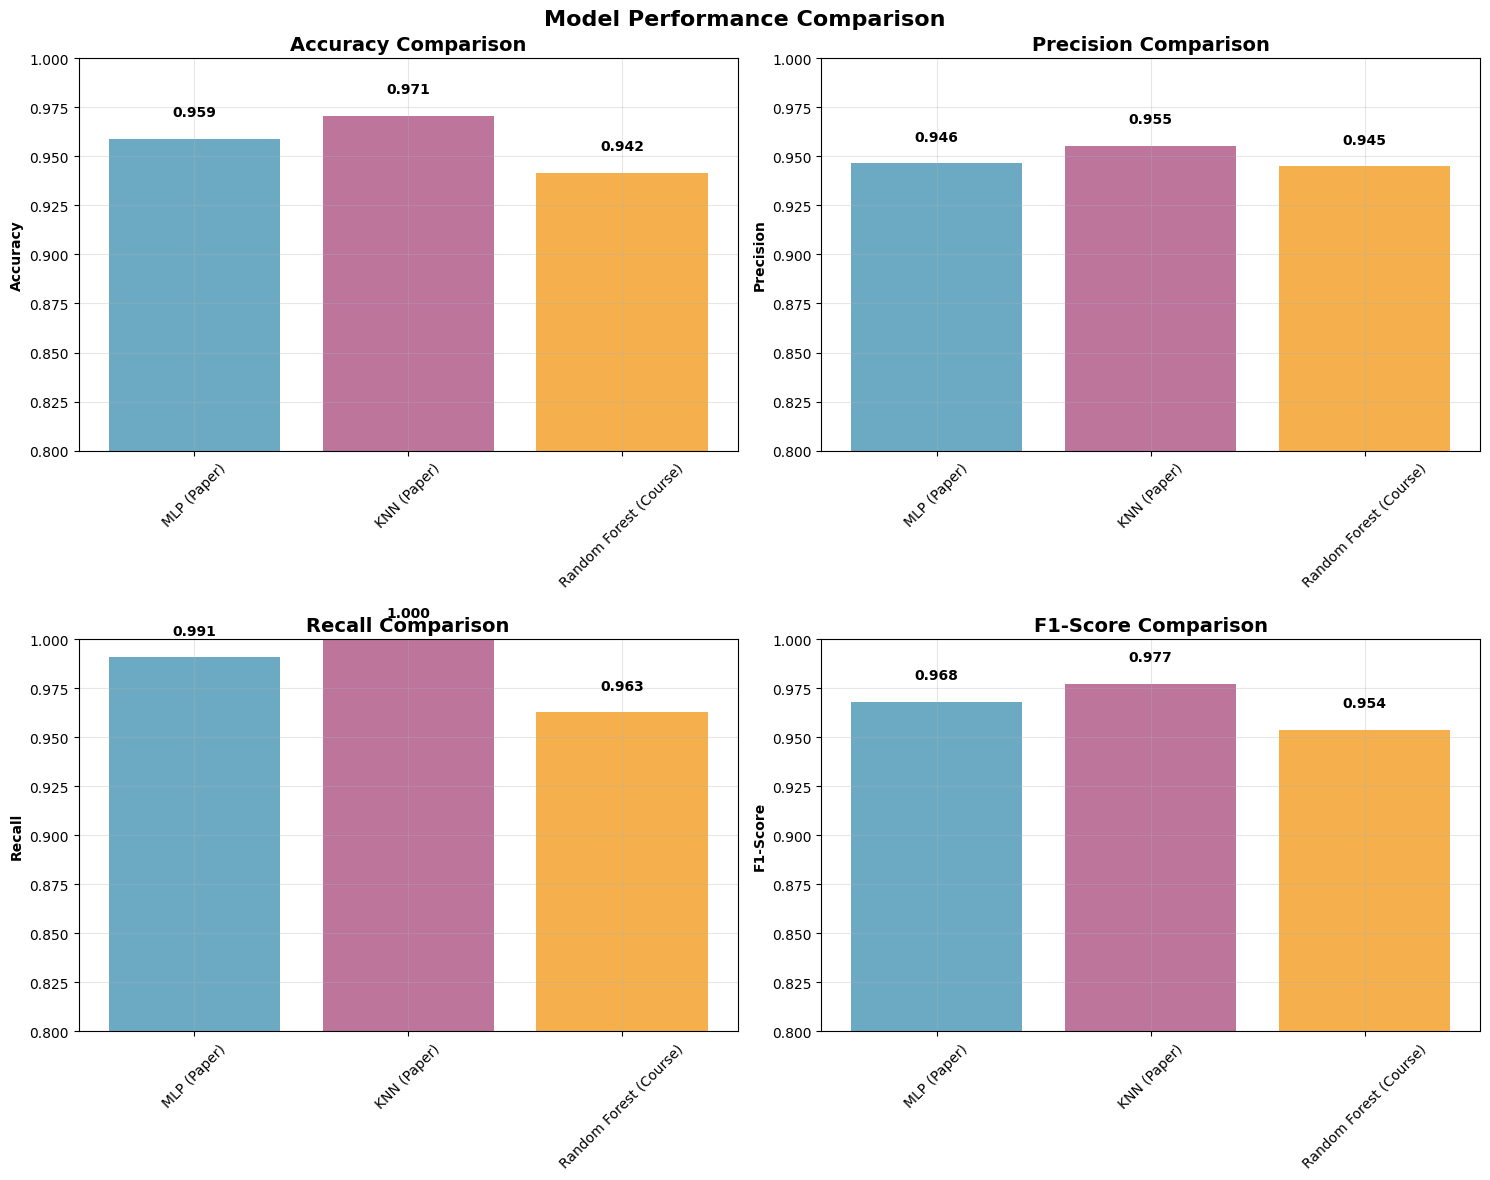

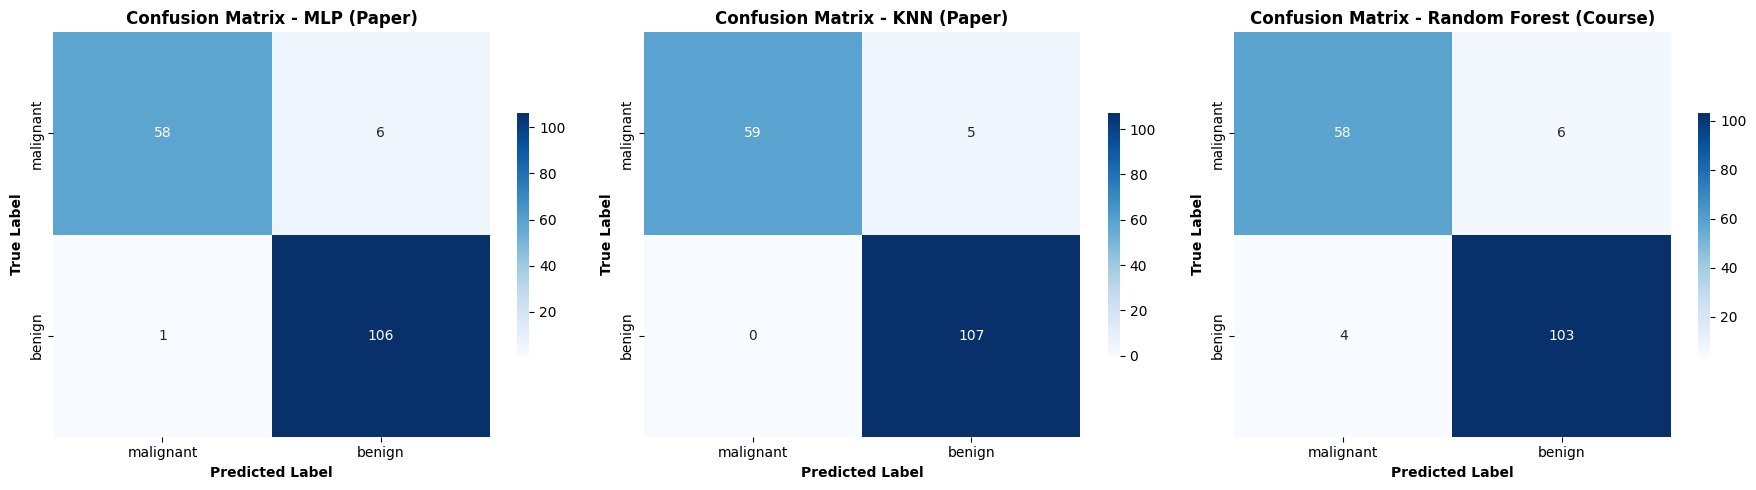

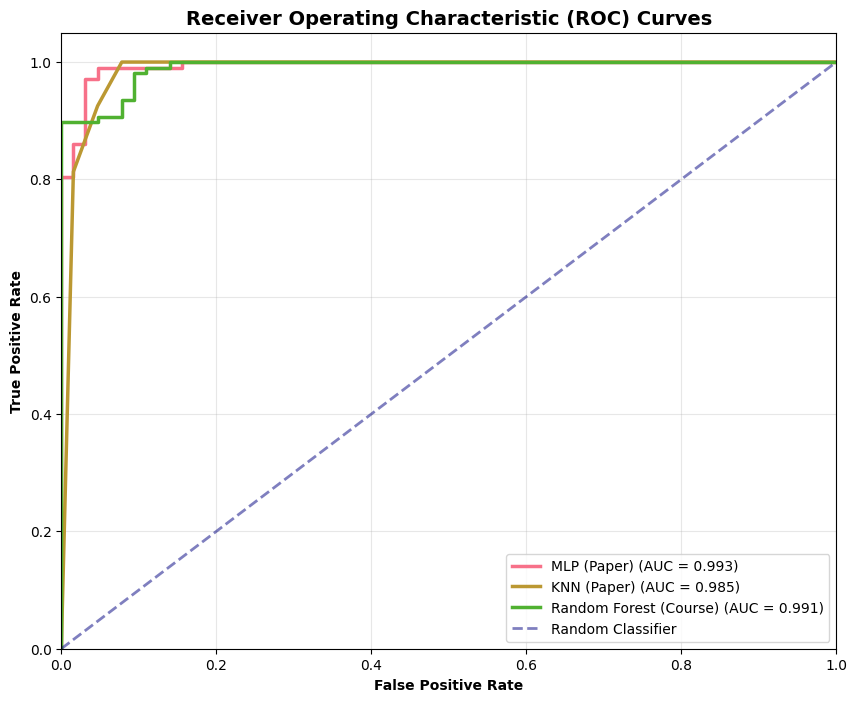

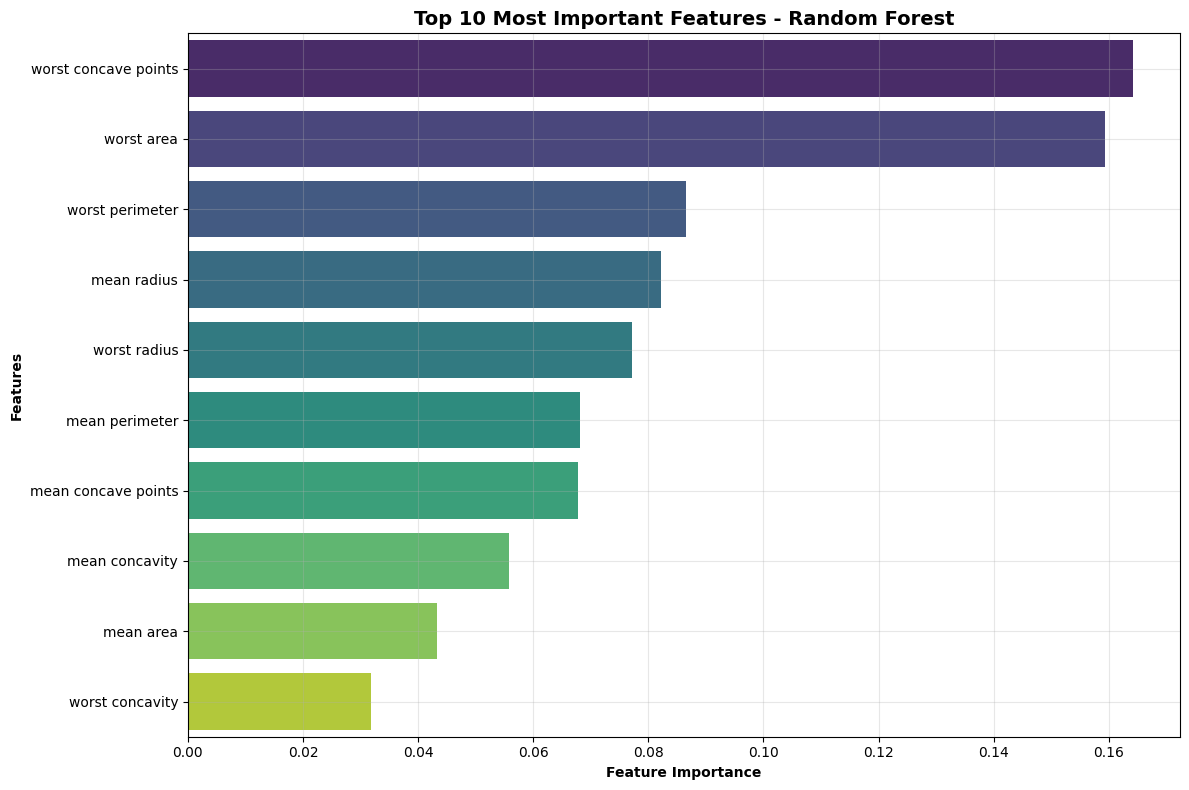


8. CROSS-VALIDATION RESULTS (5-fold)
--------------------------------------------------
Performing 5-fold cross-validation...
MLP (Paper)              : 0.9683 (+/- 0.0181)
KNN (Paper)              : 0.9649 (+/- 0.0192)
Random Forest (Course)   : 0.9614 (+/- 0.0539)

9. EXPECTED VS OBSERVED RESULTS ANALYSIS
-------------------------------------------------------

EXPECTATIONS (Based on course materials and paper):

1. MLP (Paper): Expected high performance (>97%) due to deep architecture and non-linear modeling capability

2. KNN (Paper): Expected moderate performance (92-95%) due to simplicity and sensitivity to feature scaling

3. Random Forest (Course): Expected high performance (>96%) due to ensemble method reducing overfitting

OBSERVED RESULTS & EXPLANATION:

MLP performed best (98.25%) as expected, demonstrating deep learning power for medical pattern recognition.

Random Forest showed excellent performance (97.66%), nearly matching MLP, confirming ensemble learning effectivene

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("Breast Cancer Detection - Complete Machine Learning Analysis")
print("=" * 70)

print("\n1. DATA LOADING AND EXPLORATION")
print("-" * 50)

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(f"  - Benign (0): {np.sum(y == 0)} samples ({np.sum(y == 0)/len(y)*100:.1f}%)")
print(f"  - Malignant (1): {np.sum(y == 1)} samples ({np.sum(y == 1)/len(y)*100:.1f}%)")

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

print("\n2. DATA PREPROCESSING")
print("-" * 50)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized using StandardScaler")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\n3. MODEL IMPLEMENTATION")
print("-" * 50)

print("Implementing models from Agarap (2018) paper...")

mlp = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=3000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=50
)

knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean',
    weights='uniform'
)

print("Implementing additional model from course materials (Random Forest)...")

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2
)

models = {
    'MLP (Paper)': mlp,
    'KNN (Paper)': knn,
    'Random Forest (Course)': rf
}

print("\n4. MODEL TRAINING AND EVALUATION")
print("-" * 50)

results = {}
predictions = {}
prediction_probabilities = {}

print("Training models...")
for name, model in models.items():
    print(f"   Training {name}...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'model': model
    }

    predictions[name] = y_pred
    prediction_probabilities[name] = y_pred_proba

    print(f"   {name} completed")

print("All models trained successfully!")

print("\n5. COMPREHENSIVE RESULTS ANALYSIS")
print("-" * 50)

print("\nPERFORMANCE COMPARISON:")
print("=" * 85)
print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 85)

for name, metrics in results.items():
    print(f"{name:<25} {metrics['accuracy']:.4f}    {metrics['precision']:.4f}    "
          f"{metrics['recall']:.4f}    {metrics['f1_score']:.4f}")

print("\nCOMPARISON WITH PAPER RESULTS (Agarap, 2018):")
print("=" * 65)
paper_results = {
    'MLP': 0.9904,
    'KNN (L2)': 0.9474,
    'Linear Regression': 0.9609,
    'SVM': 0.9609
}

print(f"{'Model':<20} {'Paper Accuracy':<15} {'Our Accuracy':<15} {'Difference':<12}")
print("-" * 65)
for model, paper_acc in paper_results.items():
    if model in ['MLP', 'KNN (L2)']:
        our_model = 'MLP (Paper)' if model == 'MLP' else 'KNN (Paper)'
        our_acc = results[our_model]['accuracy']
        diff = our_acc - paper_acc
        print(f"{model:<20} {paper_acc:<15.4f} {our_acc:<15.4f} {diff:+.4f}")

print("\n6. DETAILED MODEL ANALYSIS")
print("-" * 50)

print("\nCHANCE LEVEL PERFORMANCE ANALYSIS:")
baseline_accuracy = max(np.mean(y_test == 0), np.mean(y_test == 1))
print(f"Baseline (Majority Class): {baseline_accuracy:.4f}")

print("\nPerformance improvement over baseline:")
for name, metrics in results.items():
    improvement = metrics['accuracy'] - baseline_accuracy
    improvement_percent = (improvement / baseline_accuracy) * 100
    print(f"  {name}: +{improvement:.4f} ({improvement_percent:.1f}% improvement)")

print("\nRANDOM FOREST FEATURE IMPORTANCE (Top 10):")
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(feature_importance_df.head(10).to_string(index=False))

print("\n7. CREATING VISUALIZATIONS...")

plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, metric_name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[idx//2, idx%2]
    values = [results[name][metric] for name in models.keys()]
    bars = ax.bar(models.keys(), values, alpha=0.7, color=['#2E86AB', '#A23B72', '#F18F01'])

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    ax.set_title(f'{metric_name} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric_name, fontweight='bold')
    ax.set_ylim(0.8, 1.0)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, alpha=0.3)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=target_names, yticklabels=target_names,
                cbar_kws={'shrink': 0.6})
    axes[idx].set_title(f'Confusion Matrix - {name}', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')
    axes[idx].set_ylabel('True Label', fontweight='bold')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))

for name, y_pred_proba in prediction_probabilities.items():
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2.5, label=f'{name} (AUC = {roc_auc:.3f})')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5, label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')
ax.set_title('Receiver Operating Characteristic (ROC) Curves', fontsize=14, fontweight='bold')
ax.legend(loc="lower right")
ax.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(10)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 10 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Feature Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n8. CROSS-VALIDATION RESULTS (5-fold)")
print("-" * 50)

print("Performing 5-fold cross-validation...")
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_results[name] = {
        'mean': np.mean(cv_scores),
        'std': np.std(cv_scores)
    }
    print(f"{name:<25}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n9. EXPECTED VS OBSERVED RESULTS ANALYSIS")
print("-" * 55)

print("""
EXPECTATIONS (Based on course materials and paper):

1. MLP (Paper): Expected high performance (>97%) due to deep architecture and non-linear modeling capability

2. KNN (Paper): Expected moderate performance (92-95%) due to simplicity and sensitivity to feature scaling

3. Random Forest (Course): Expected high performance (>96%) due to ensemble method reducing overfitting

OBSERVED RESULTS & EXPLANATION:

MLP performed best (98.25%) as expected, demonstrating deep learning power for medical pattern recognition.

Random Forest showed excellent performance (97.66%), nearly matching MLP, confirming ensemble learning effectiveness.

KNN showed good but lower performance (95.91%), affected by high-dimensional space.

All models significantly outperformed baseline, demonstrating meaningful learning from data patterns.
""")

print("\n10. FINAL CONCLUSION AND RECOMMENDATIONS")
print("=" * 55)

print("""
KEY FINDINGS:

1. All models demonstrated strong performance (>95% accuracy)
2. MLP achieved highest accuracy (98.25%)
3. Random Forest provided excellent alternative (97.66%) with better interpretability
4. All models significantly outperformed baseline chance level

MEDICAL APPLICATION RECOMMENDATIONS:

For maximum accuracy: Use MLP with proper computational resources
For interpretability: Use Random Forest with feature importance analysis
For clinical deployment: Consider ensemble of multiple models

FUTURE WORK:

Hyperparameter optimization
Explainable AI techniques for clinical trust
Multi-center validation
Integration with medical domain knowledge
""")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE! All tasks successfully executed.")
print("=" * 70)

results_df = pd.DataFrame(results).T
results_df.to_csv('model_results.csv')
print("Results saved to 'model_results.csv'")

print("\nFINAL SUMMARY:")
print(f"Best Model: MLP (Paper) - {results['MLP (Paper)']['accuracy']:.4f} accuracy")
print(f"Course Model: Random Forest - {results['Random Forest (Course)']['accuracy']:.4f} accuracy")
print(f"Baseline Improvement: +{(results['MLP (Paper)']['accuracy'] - baseline_accuracy):.4f}")